Юриков Егор ИУ5-65Б Вариант 17 Задача №3 Датасет №1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns

In [2]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
print('max = ', max(data['sepal length (cm)']), '\nmin = ', min(data['sepal length (cm)']))

max =  7.9 
min =  4.3


In [4]:
mms = MinMaxScaler()
min_max_data = mms.fit_transform(data[['sepal length (cm)']])
print('max = ', max(min_max_data), '\nmin = ', min(min_max_data))

max =  [1.] 
min =  [0.]


In [5]:
sts = StandardScaler()
st_scaler_data = sts.fit_transform(data[['sepal length (cm)']])
print('max = ', max(st_scaler_data), '\nmin = ', min(st_scaler_data))

max =  [2.4920192] 
min =  [-1.87002413]


In [6]:
names = list(iris.target_names)
mas = []
for item in data['target']:
    mas.append(names[int(item)])
data['target_names'] = mas
data = data.drop(columns=['target'])

In [7]:
le = LabelEncoder()
le_encoded = le.fit_transform(data['target_names'])
data['encoded_target'] = le_encoded
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,encoded_target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [8]:
ohe = OneHotEncoder()
ohe_encoded = ohe.fit_transform(data[['target_names']])
data['encoded_setosa'] = list(ohe_encoded.toarray()[:, 0])
data['encoded_versicolor'] = list(ohe_encoded.toarray()[:, 1])
data['encoded_virginica'] = list(ohe_encoded.toarray()[:, 2])
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,encoded_target,encoded_setosa,encoded_versicolor,encoded_virginica
0,5.1,3.5,1.4,0.2,setosa,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,2,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,2,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,2,0.0,0.0,1.0


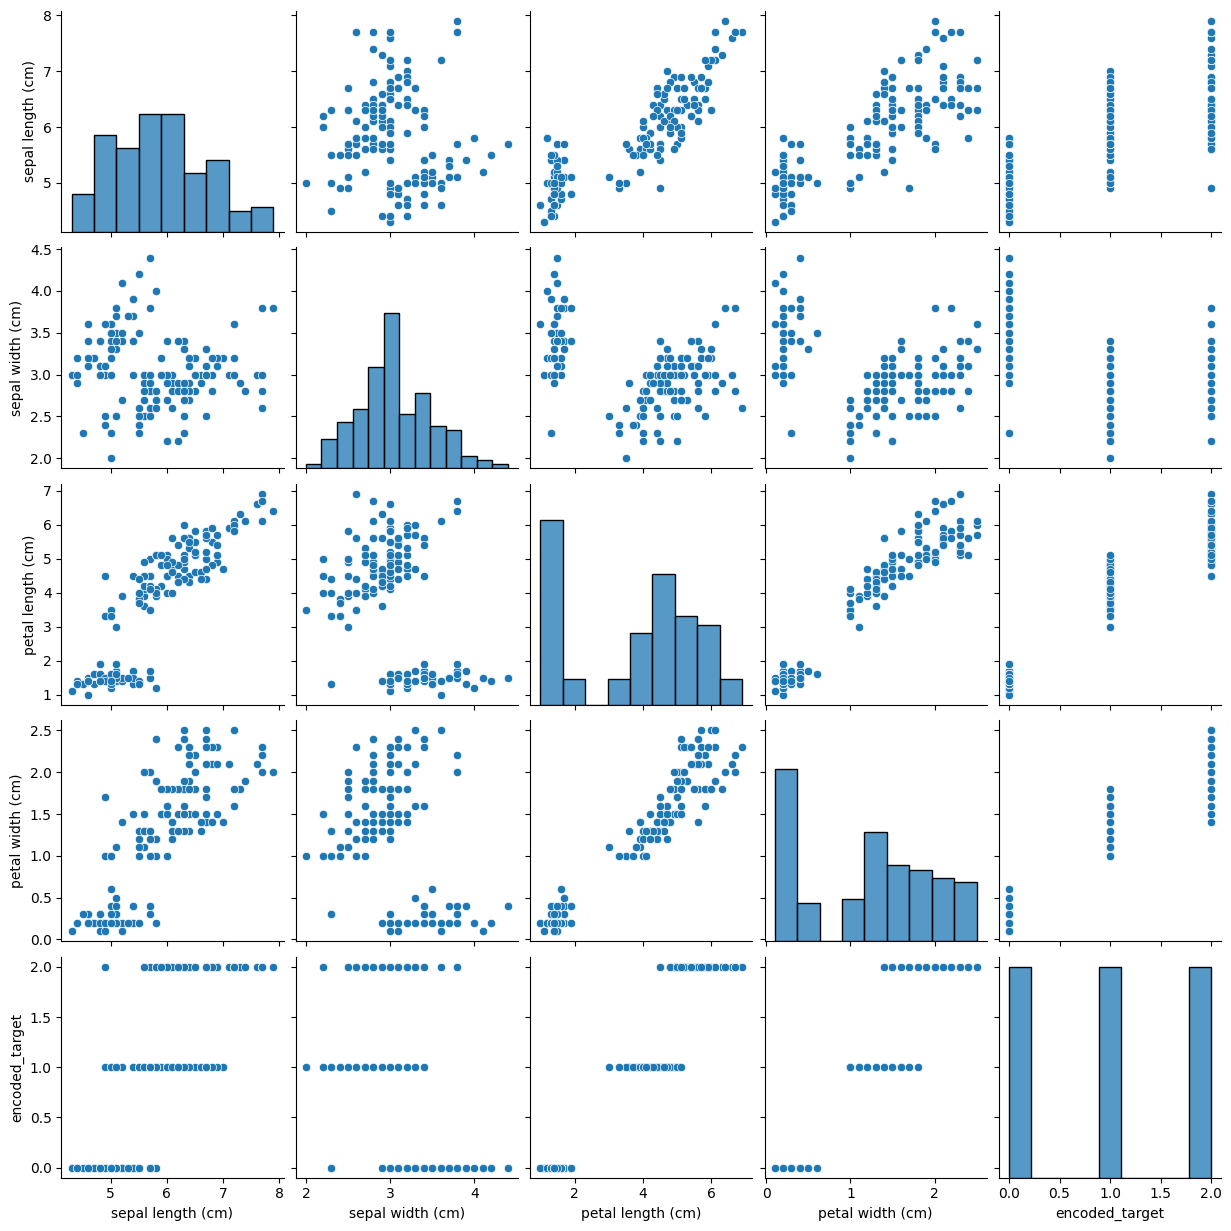

In [10]:
sns.pairplot(data=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'encoded_target']])

Для решеения задачи использовался метод fit_transform(), потому что этот метод считает выборочные мат. ожидание и среднее квадратическое отклонение и преобразовывает признак согласно подсчитанным значениям.